<a href="https://colab.research.google.com/github/llll121/Introduction-to-ML/blob/main/Week7Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load the Dataset

In [2]:
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

In [3]:
from textblob import TextBlob
blob=TextBlob(data)

In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## Get Frequencies

In [5]:
items = blob.word_counts.items()

## Eliminate the Stop Words

In [6]:
items = [item for item in items if item[0] not in stop_words]

## Sort Words by Frequency

In [7]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

## Get the Top 20 Words

In [8]:
top20 = sorted_items[:20]

In [9]:
import pandas as pd
top20_df = pd.DataFrame(top20, columns=['word', 'count']) 

## Visualizing the DataFrame

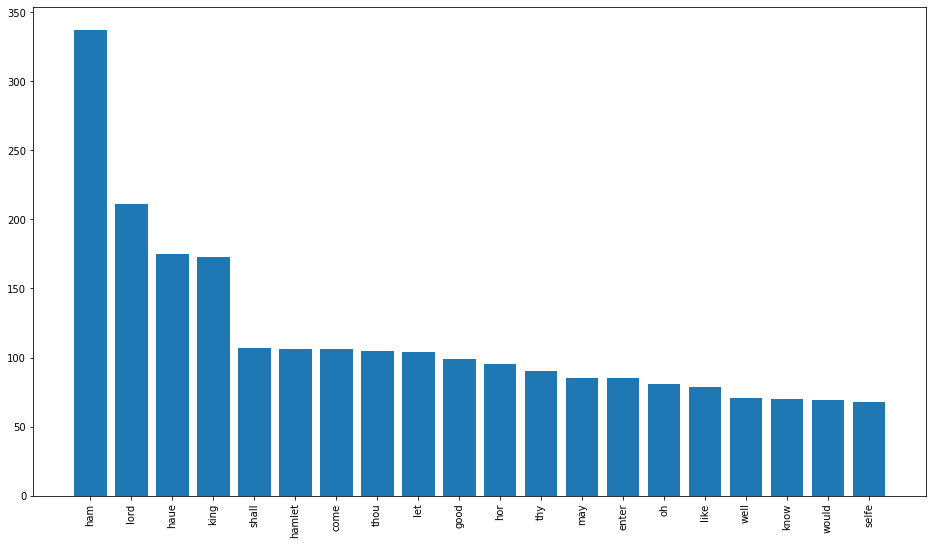

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.bar(top20_df['word'], top20_df['count'])
plt.xticks(rotation = 90)
plt.show()

## Load the Mask Image that Specifies the Word Cloud’s Shape

In [11]:
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

## Configuring the WordCloud Object

In [12]:
from wordcloud import WordCloud 
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

## Generating the Word Cloud

In [13]:
wordcloud = wordcloud.generate(data)

## Display the Image with Matplotlib

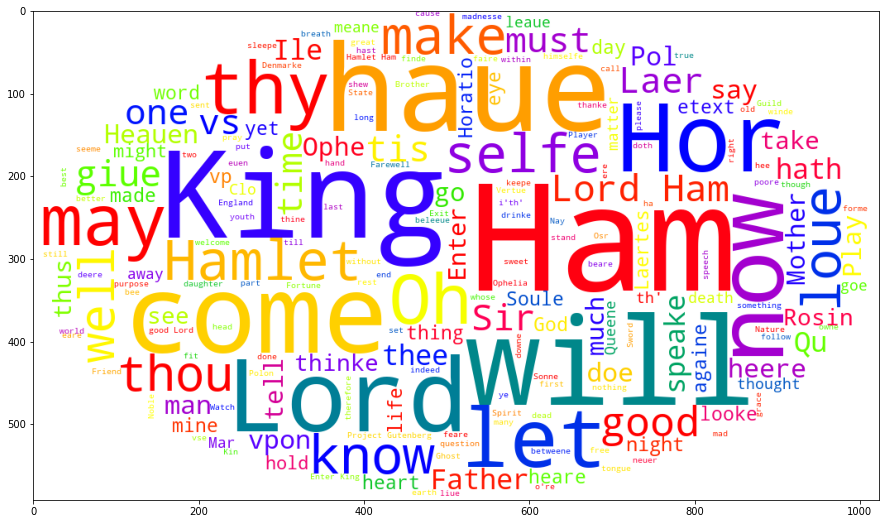

In [14]:
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.show()